# Load Library yang Dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Menyiapkan Dataset

In [3]:
#Membaca Data application_train.csv
train_data = pd.read_csv('/content/drive/MyDrive/Datasets/application_train.csv')
print('Jumlah duplikasi data:', train_data.duplicated().sum())
print("Dataset ini terdapat %d baris dan %d kolom\n" %train_data.shape)

train_data.head()

Jumlah duplikasi data: 0
Dataset ini terdapat 307511 baris dan 122 kolom



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Mengecek info tipe data dalam dataset train_data
train_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
#Membaca Data application_test.csv
test_data = pd.read_csv('/content/drive/MyDrive/Datasets/application_test.csv')
print('Jumlah duplikasi data:', test_data.duplicated().sum())
print("Dataset ini terdapat %d baris dan %d kolom\n" % test_data.shape)

test_data.head()

Jumlah duplikasi data: 0
Dataset ini terdapat 48744 baris dan 121 kolom



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Mengecek info tipe data dalam dataset test_data
test_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

Dataset train_data dan test_data memiliki kesamaan nama kolom, kecuali kolom 'TARGET' yang tidak terdapat pada test_data.

In [7]:
#Menghapus kolom yang tidak berkaitan dengan target (agar menghemat memori)
train_data = train_data.drop(train_data.iloc[:, 44:122], axis=1).drop(columns=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1)
test_data = test_data.drop(test_data.iloc[:, 43:121], axis=1).drop(columns=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1)

In [8]:
#Mengecek kembali info tipe data dalam dataset train_data
train_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [9]:
#Mengecek kembali info tipe data dalam dataset test_data
test_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

In [10]:
#Membaca Data bureau.csv
bureau = pd.read_csv('/content/drive/MyDrive/Datasets/bureau.csv')
print('Jumlah duplikasi data:', bureau.duplicated().sum())
print("Dataset ini terdapat %d baris dan %d kolom\n" %bureau.shape)

bureau.head()

Jumlah duplikasi data: 0
Dataset ini terdapat 1716428 baris dan 17 kolom



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [11]:
#Mengecek info tipe data dalam dataset bureau
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [12]:
#Memilih feature tertentu yang diduga dapat berpengaruh terhadap target serta mengagregasi data dalam dataset bureau berdasarkan satu 'SK_ID_CURR' yang unik
agg_bureau = bureau.groupby('SK_ID_CURR').agg({'CREDIT_ACTIVE': 'last', #Mengambil nilai terakhir dari setiap SK_ID_CURR
                                               'CREDIT_TYPE': 'last', #Mengambil nilai terakhir dari setiap SK_ID_CURR
                                               'DAYS_CREDIT':'mean', 'CREDIT_DAY_OVERDUE':'mean', 'DAYS_CREDIT_ENDDATE':'mean',
                                               'DAYS_ENDDATE_FACT':'mean', 'AMT_CREDIT_MAX_OVERDUE':'sum', 'CNT_CREDIT_PROLONG':'mean',
                                               'AMT_CREDIT_SUM':'sum', 'AMT_CREDIT_SUM_DEBT':'sum', 'AMT_CREDIT_SUM_LIMIT':'sum',
                                               'AMT_CREDIT_SUM_OVERDUE':'sum', 'DAYS_CREDIT_UPDATE':'mean', 'AMT_ANNUITY':'sum'}).reset_index()

print('Jumlah baris & kolom:', agg_bureau.shape)
agg_bureau.head(10)

Jumlah baris & kolom: (305811, 15)


,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_TYPE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,Active,Consumer credit,-735.000000,0.0,82.428571,-825.500000,0.000,0.0,1453365.000,596686.5,0.000,0.0,-93.142857,24817.5
1,100002,Closed,Credit card,-874.000000,0.0,-349.000000,-697.500000,8405.145,0.0,865055.565,245781.0,31988.565,0.0,-499.875000,0.0
2,100003,Active,Credit card,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,1017400.500,0.0,810000.000,0.0,-816.000000,0.0
3,100004,Closed,Consumer credit,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,189037.800,0.0,0.000,0.0,-532.000000,0.0
4,100005,Active,Consumer credit,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,657126.000,568408.5,0.000,0.0,-54.333333,4261.5
5,100007,Closed,Consumer credit,-1149.000000,0.0,-783.000000,-783.000000,0.000,0.0,146250.000,0.0,0.000,0.0,-783.000000,0.0
6,100008,Closed,Consumer credit,-757.333333,0.0,-391.333333,-909.000000,0.000,0.0,468445.500,240057.0,0.000,0.0,-611.000000,0.0
7,100009,Closed,Consumer credit,-1271.500000,0.0,-794.937500,-1108.500000,0.000,0.0,4800811.500,1077349.5,0.000,0.0,-851.611111,0.0
8,100010,Closed,Loan for business development,-1939.500000,0.0,-119.500000,-1138.000000,0.000,0.0,990000.000,348007.5,0.000,0.0,-578.000000,0.0
9,100011,Closed,Consumer credit,-1773.000000,0.0,-1293.250000,-1463.250000,10147.230,0.0,435228.300,0.0,0.000,0.0,-1454.750000,0.0


In [13]:
#Membaca Data previous_application.csv
prev_app = pd.read_csv('/content/drive/MyDrive/Datasets/previous_application.csv')
print('Jumlah duplikasi data:', prev_app.duplicated().sum())
print("Dataset ini terdapat  %d baris dan %d kolom\n" %prev_app.shape)
prev_app.head()

Jumlah duplikasi data: 0
Dataset ini terdapat  1670214 baris dan 37 kolom



,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Mengecek info tipe data dalam dataset prev_app
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
#Memilih feature tertentu yang diduga dapat berpengaruh terhadap target serta mengagregasi data dalam dataset prev_app berdasarkan satu 'SK_ID_CURR' yang unik
agg_prev_app = prev_app.groupby('SK_ID_CURR').agg({'NAME_CONTRACT_STATUS': 'last',#Mengambil nilai terakhir dari setiap SK_ID_CURR
                                                   'CODE_REJECT_REASON': 'last', #Mengambil nilai terakhir dari setiap SK_ID_CURR
                                                   'AMT_ANNUITY':'sum', 'AMT_APPLICATION':'sum', 'AMT_CREDIT':'sum', 'AMT_DOWN_PAYMENT':'sum',
                                                   'AMT_GOODS_PRICE':'sum', 'RATE_DOWN_PAYMENT':'mean',
                                                   'CNT_PAYMENT':'mean', 'DAYS_FIRST_DRAWING':'mean', 'DAYS_FIRST_DUE':'mean',
                                                   'DAYS_LAST_DUE_1ST_VERSION':'mean', 'DAYS_LAST_DUE':'mean', 'DAYS_TERMINATION':'mean'}).reset_index()

print('Jumlah baris & kolom:', agg_prev_app.shape)
agg_prev_app.head(10)

Jumlah baris & kolom: (338857, 15)


,SK_ID_CURR,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,100001,Approved,XAP,3951.000,24835.50,23787.0,2520.00,24835.50,0.104326,8.000000,365243.0,-1709.000000,-1499.000000,-1619.000000,-1612.000000
1,100002,Approved,XAP,9251.775,179055.00,179055.0,0.00,179055.00,0.000000,24.000000,365243.0,-565.000000,125.000000,-25.000000,-17.000000
2,100003,Approved,XAP,169661.970,1306309.50,1452573.0,6885.00,1306309.50,0.050030,10.000000,365243.0,-1274.333333,-1004.333333,-1054.333333,-1047.333333
3,100004,Approved,XAP,5357.250,24282.00,20106.0,4860.00,24282.00,0.212008,4.000000,365243.0,-784.000000,-694.000000,-724.000000,-714.000000
4,100005,Approved,XAP,4813.200,44617.50,40153.5,4464.00,44617.50,0.108964,12.000000,365243.0,-706.000000,-376.000000,-466.000000,-460.000000
5,100006,Refused,LIMIT,141907.050,2449829.34,2625259.5,69680.34,2449829.34,0.163412,23.000000,365243.0,91066.500000,91584.000000,182477.500000,182481.750000
6,100007,Approved,XAP,73672.830,903181.50,999832.5,6781.50,903181.50,0.159516,20.666667,365243.0,-1263.200000,-837.200000,72136.200000,72143.800000
7,100008,Approved,XAP,63358.785,778509.00,813838.5,16645.50,778509.00,0.073051,14.000000,365243.0,-1434.500000,-1044.500000,-1209.500000,-872.750000
8,100009,Approved,XAP,70359.885,537192.00,490963.5,64422.00,537192.00,0.126602,8.000000,365243.0,-688.285714,-478.285714,51666.857143,51672.857143
9,100010,Approved,XAP,27463.410,247212.00,260811.0,0.00,247212.00,0.000000,10.000000,365243.0,-1039.000000,-769.000000,-769.000000,-762.000000


In [16]:
#Menggabungkan train_data dengan semua dataset hasil agregasi
train_df = pd.merge(pd.merge(train_data, agg_bureau, how='left', on='SK_ID_CURR'), agg_prev_app, how='left', on='SK_ID_CURR')
print('Jumlah baris & kolom:', train_df.shape)
train_df.head(10)

Jumlah baris & kolom: (307511, 70)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,179055.0,0.00,179055.00,0.000000,24.000000,365243.000000,-565.000000,125.000000,-25.000000,-17.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1452573.0,6885.00,1306309.50,0.050030,10.000000,365243.000000,-1274.333333,-1004.333333,-1054.333333,-1047.333333
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,20106.0,4860.00,24282.00,0.212008,4.000000,365243.000000,-784.000000,-694.000000,-724.000000,-714.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2625259.5,69680.34,2449829.34,0.163412,23.000000,365243.000000,91066.500000,91584.000000,182477.500000,182481.750000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,999832.5,6781.50,903181.50,0.159516,20.666667,365243.000000,-1263.200000,-837.200000,72136.200000,72143.800000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,813838.5,16645.50,778509.00,0.073051,14.000000,365243.000000,-1434.500000,-1044.500000,-1209.500000,-872.750000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,490963.5,64422.00,537192.00,0.126602,8.000000,365243.000000,-688.285714,-478.285714,51666.857143,51672.857143
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,260811.0,0.00,247212.00,0.000000,10.000000,365243.000000,-1039.000000,-769.000000,-769.000000,-762.000000
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,1047361.5,13594.50,810931.50,0.050005,14.000000,242736.333333,-1955.000000,120935.666667,-1231.000000,121258.000000
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,296478.0,0.00,243720.00,0.000000,18.000000,365243.000000,-973.333333,-463.333333,-563.333333,-559.333333


In [97]:
#Menggabungkan test_data dengan semua dataset hasil agregasi
test_df = pd.merge(pd.merge(test_data, agg_bureau, how='left', on='SK_ID_CURR'), agg_prev_app, how='left', on='SK_ID_CURR')
print('Jumlah baris & kolom:', test_df.shape)
test_df.head(10)

Jumlah baris & kolom: (48744, 69)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,RATE_DOWN_PAYMENT,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,23787.00,2520.00,24835.5,0.104326,8.000000,365243.000000,-1709.000000,-1499.000000,-1619.000000,-1612.000000
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,40153.50,4464.00,44617.5,0.108964,12.000000,365243.000000,-706.000000,-376.000000,-466.000000,-460.000000
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,584536.50,6750.00,523485.0,0.067217,17.333333,365243.000000,-1005.666667,-515.666667,-715.666667,-710.333333
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,464602.50,11250.00,246037.5,0.057708,11.333333,243054.333333,-1271.000000,121221.333333,121171.333333,121182.666667
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,601101.00,8095.50,535455.0,0.087554,24.000000,365243.000000,-787.000000,-457.000000,-457.000000,-449.000000
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,4123512.00,9796.50,3742956.0,0.025348,21.111111,312701.571429,-1854.000000,51239.714286,-1461.571429,50913.714286
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,195045.75,17523.45,201584.7,0.107434,8.333333,365243.000000,-485.000000,-265.000000,121342.000000,121346.000000
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,82026.00,35154.00,117180.0,0.326727,5.000000,365243.000000,-1151.000000,-1031.000000,-1031.000000,-1027.000000
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,1175661.00,0.00,1053054.0,0.000000,21.500000,365243.000000,72625.600000,73087.600000,145922.000000,145924.000000
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,4360392.00,57622.50,4205209.5,0.228170,23.700000,312690.000000,-1439.571429,51361.571429,103446.000000,103450.714286


# Melakukan Data Preprocessing

## Mengecek dataset train_df

In [18]:
#Mengecek info dataset train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT_x                 307511 non-null  float64
 9   AMT_ANNUITY_x                307499 non-null  float64
 10  AMT_GOODS_PRICE_x            307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
#Melihat deskripsi statistik dari train_df
train_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
DAYS_FIRST_DRAWING,289760.0,NaN,NaN,NaN,343116.25544,55562.803622,-2922.0,365243.0,365243.0,365243.0,365243.0
DAYS_FIRST_DUE,289760.0,NaN,NaN,NaN,11457.886991,39647.259755,-2891.0,-1343.5,-831.0,-404.3125,365243.0
DAYS_LAST_DUE_1ST_VERSION,289760.0,NaN,NaN,NaN,30509.889579,61244.017239,-2798.0,-796.75,-208.0,51267.75,365243.0
DAYS_LAST_DUE,289760.0,NaN,NaN,NaN,80718.079327,107799.680927,-2883.0,-838.0,-53.0,121607.0,365243.0


Kolom DAYS_BIRTH dan yang lainnya memiliki nilai yang negatif, sehingga perlu diubah menjadi positif. Kolom DAYS_EMPLOYED, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, dan	DAYS_TERMINATION memiliki jumlah hari yang paling besar yaitu 365243 hari (/1000 tahun?).

In [20]:
#Mengecek jumlah missing value train_df dengan menggunakan fungsi
def checksum_isna(df):
  isna_df = pd.DataFrame({
        'Column': df.columns,
        'Type': df.dtypes,
        'Total Null Value': df.isnull().sum(),
        'Percentage': df.isnull().mean() * 100
    })
  isna_df = isna_df.sort_values(by='Percentage', ascending=False).reset_index(drop=True)
  return isna_df

checksum_isna(train_df)

,Column,Type,Total Null Value,Percentage
0,OWN_CAR_AGE,float64,202929,65.990810
1,EXT_SOURCE_1,float64,173378,56.381073
2,OCCUPATION_TYPE,object,96391,31.345545
3,DAYS_ENDDATE_FACT,float64,77156,25.090485
4,EXT_SOURCE_3,float64,60965,19.825307
...,...,...,...,...
65,REG_REGION_NOT_LIVE_REGION,int64,0,0.000000
66,REG_REGION_NOT_WORK_REGION,int64,0,0.000000
67,LIVE_REGION_NOT_WORK_REGION,int64,0,0.000000
68,TARGET,int64,0,0.000000


Dua kolom pertama memiliki missing value yang paling besar di atas 50%, serta missing value pada kolom 'AMT...' akan dianggap dengan nilai nol.

In [21]:
#Mengecek jumlah outliers train_df dengan menggunakan fungsi
outliers_data= []
for column in train_df.columns:
  if train_df[column].dtypes != 'object':
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    iqr = Q3 - Q1

    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr

    outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]

    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(train_df)) * 100

    outliers_data.append({'column_name': column, 'number_of_outliers': num_outliers, 'percentage': percentage_outliers})

outliers_df = pd.DataFrame(outliers_data)
outliers_df.sort_values(by='percentage',ascending=False)

,column_name,number_of_outliers,percentage
20,REGION_RATING_CLIENT,80527,26.186706
21,REGION_RATING_CLIENT_W_CITY,78027,25.373726
9,DAYS_EMPLOYED,72217,23.484363
26,REG_CITY_NOT_WORK_CITY,70867,23.045354
35,AMT_CREDIT_MAX_OVERDUE,64330,20.919577
15,FLAG_WORK_PHONE,61308,19.936848
42,AMT_ANNUITY_y,60272,19.599949
14,FLAG_EMP_PHONE,55386,18.011063
27,LIVE_CITY_NOT_WORK_CITY,55215,17.955455
50,DAYS_FIRST_DRAWING,53352,17.349623


Kolom yang memiliki nilai outlier tertinggi yaitu REGION_RATING_CLIENT dengan jumlah outlier sebanyak 80.527 atau 26.18% dari total data. Tetapi karena kolom tersebut merupakan data kategorikal numerik, sehingga kolom tersebut dan kolom sejenisnya tidak akan diperiksa visualisasi outliernya. Hanya kolom jumlah hari dan jumlah kredit yang akan diperiksa visualisasi outliernya.

In [22]:
#Memberikan nilai absolut untuk kolom 'DAYS...'
days_df = train_df.iloc[:,[17,18,19,20,44,45,46,47,54,65,66,67,68,69]].abs()
for column in list(days_df.columns):
  train_df[column] = days_df[column]

<Axes: >

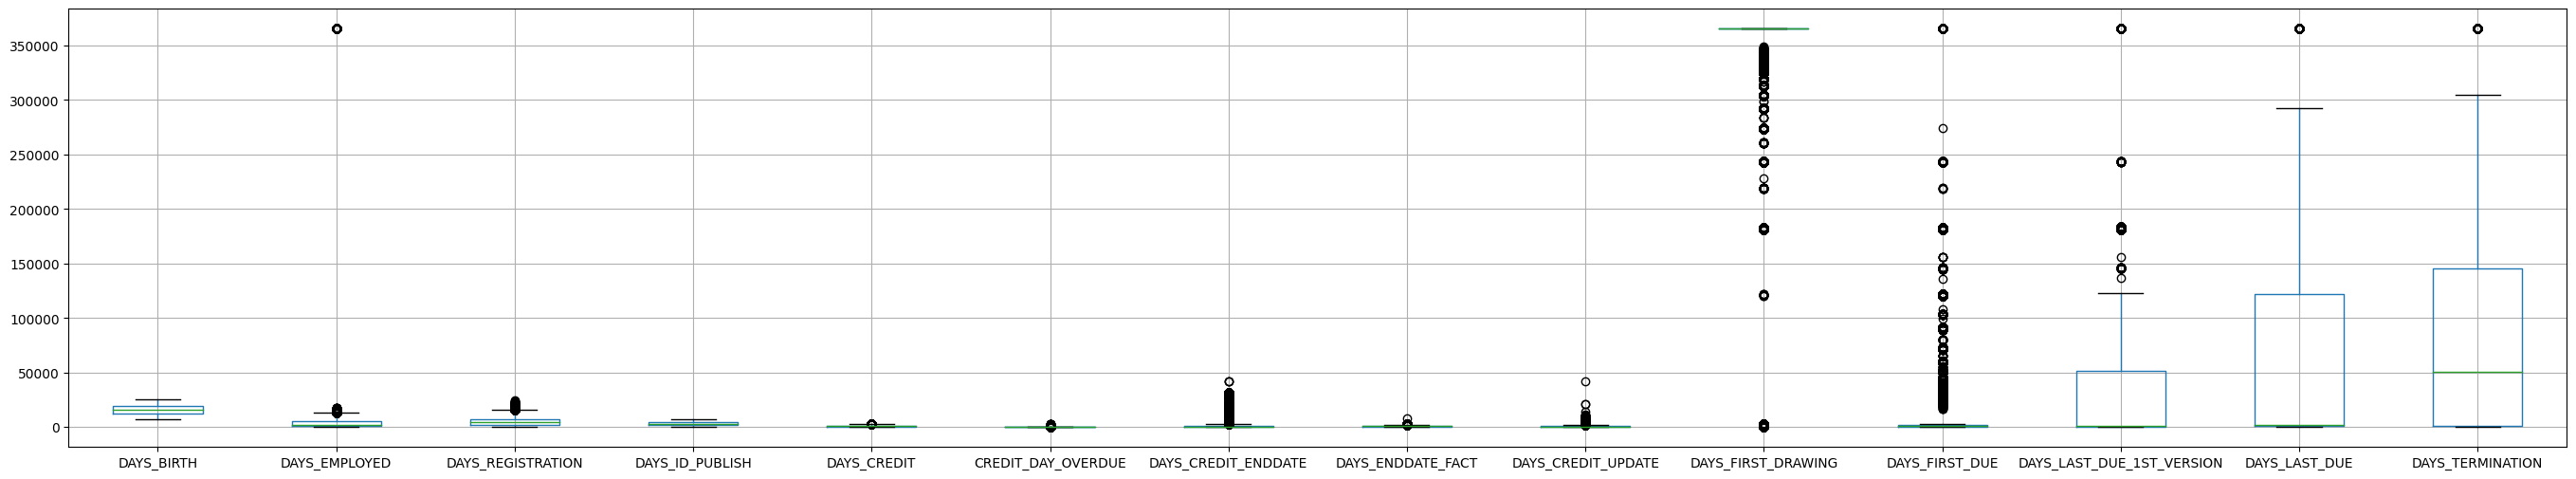

In [23]:
#Melihat visualisasi dari kolom jumlah hari
train_df.iloc[:,[17,18,19,20,44,45,46,47,54,65,66,67,68,69]].boxplot(figsize=(34,6))

Data pada kolom 'DAYS_EMPLOYED', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', dan 'DAYS_TERMINATION' memiliki nilai yang sangat besar (>50.000 hari) dan banyak outlier, sehingga kolom tersebut akan dihapus.

<Axes: >

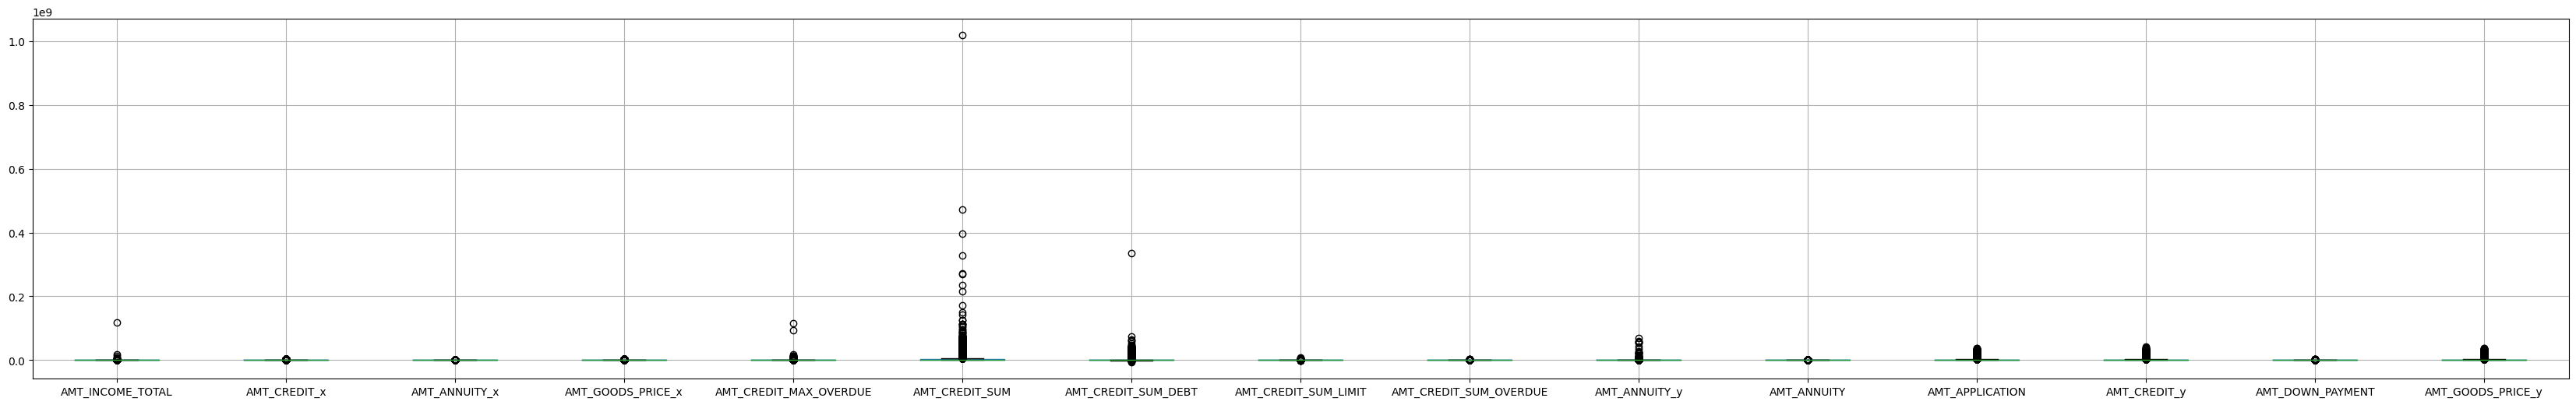

In [24]:
#Melihat visualisasi dari kolom jumlah kredit
train_df.iloc[:,[7,8,9,10,48,50,51,52,53,55,58,59,60,61,62]].boxplot(figsize=(42,6))

Data pada kolom 'AMT_CREDIT_SUM' memiliki banyak nilai outlier yang menyebar dengan nilai > 0,2, akan tetapi kolom tersebut akan dibiarkan apa adanya, karena merupakan feature yang cukup berpengaruh terhadap target.

## Melakukan Cleaning Data train_df

In [25]:
#Menghapus kolom yang memiliki data hari yang sangat besar dengan nilai >50000 hari
train_df = train_df.drop(train_df.columns[[18,65,66,67,68,69]], axis=1)
train_df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,AMT_ANNUITY_y,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,RATE_DOWN_PAYMENT,CNT_PAYMENT
165500,291854,0,Cash loans,F,Y,N,1,144000.0,1516500.0,44338.5,...,0.0,Canceled,XAP,28757.340,292230.00,324958.5,0.00,292230.00,0.000000,14.000000
182043,311002,0,Cash loans,F,N,N,0,90000.0,270000.0,28777.5,...,NaN,Approved,XAP,8368.020,50715.00,45252.0,10143.00,50715.00,0.199416,6.000000
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0.0,Approved,XAP,23979.600,360000.00,360000.0,0.00,360000.00,NaN,18.000000
116278,234846,0,Cash loans,F,N,Y,0,157500.0,405000.0,18877.5,...,0.0,Approved,XAP,4334.445,35955.00,41652.0,0.00,35955.00,0.000000,12.000000
67430,178197,0,Cash loans,F,N,N,1,103500.0,284400.0,10849.5,...,0.0,Unused offer,CLIENT,17102.205,350381.25,340312.5,11027.25,350381.25,0.074168,8.666667


In [26]:
#Menghapus kolom yang memiliki missing value yang lebih dari 50 persen
train_df = train_df.drop(columns=['OWN_CAR_AGE','EXT_SOURCE_1'],axis=1)

In [27]:
#Mengisi nilai missing value dengan modus untuk kolom bertipe data 'object', sebaliknya dengan nilai nol dan median untuk kolom bertipe data numerik
for column in list(train_df.columns):
  if train_df[column].isnull().sum() > 0:
    if train_df[column].dtypes == 'object':
      train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    elif column.find('AMT') == 0: #Mencari kolom dengan nama depan 'AMT' dan mengembalikan posisi index
      train_df[column].fillna(0, inplace=True) #Mengisi dengan nilai nol
    else:
      train_df[column].fillna(train_df[column].median(), inplace=True)

checksum_isna(train_df)

,Column,Type,Total Null Value,Percentage
0,SK_ID_CURR,int64,0,0.0
1,CNT_CREDIT_PROLONG,float64,0,0.0
2,REG_CITY_NOT_LIVE_CITY,int64,0,0.0
3,REG_CITY_NOT_WORK_CITY,int64,0,0.0
4,LIVE_CITY_NOT_WORK_CITY,int64,0,0.0
...,...,...,...,...
57,FLAG_EMAIL,int64,0,0.0
58,OCCUPATION_TYPE,object,0,0.0
59,CNT_FAM_MEMBERS,float64,0,0.0
60,REGION_RATING_CLIENT,int64,0,0.0


Semua kolom sudah bersih dari missing values

In [28]:
#Melihat nilai unik dari setiap kolom yang memiliki tipe data 'object'
for column in list(train_df.columns):
    if train_df[column].dtypes == 'object':
      print(f"Nilai unik kolom {column}:", train_df[column].unique())

Nilai unik kolom NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
Nilai unik kolom CODE_GENDER: ['M' 'F' 'XNA']
Nilai unik kolom FLAG_OWN_CAR: ['N' 'Y']
Nilai unik kolom FLAG_OWN_REALTY: ['Y' 'N']
Nilai unik kolom NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
Nilai unik kolom NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
Nilai unik kolom NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Nilai unik kolom NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
Nilai unik kolom NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
Nilai unik kolom OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'S

Pada kolom CODE_GENDER, terdapat nilai unik 'XNA'. Nilai unik tersebut akan dihapus.

In [29]:
#Memilih nilai unik CODE_GENDER yang bukan 'XNA'
train_df = train_df[train_df.CODE_GENDER != 'XNA']

In [30]:
#Melihat kembali nilai unik kolom CODE_GENDER
train_df['CODE_GENDER'].unique()

array(['M', 'F'], dtype=object)

In [31]:
#Mengubah nilai kolom DAYS_BIRTH menjadi usia dalam tahun
train_df.DAYS_BIRTH = (train_df.DAYS_BIRTH.abs() / 365).astype(int)
train_df.DAYS_BIRTH.sample(5)

<ipython-input-31-ec7cb6816835>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.DAYS_BIRTH = (train_df.DAYS_BIRTH.abs() / 365).astype(int)


207018    45
260957    51
89697     23
260933    53
268024    57
Name: DAYS_BIRTH, dtype: int64

Data telah bersih dari missing value dan memiliki nilai unik yang telah sesuai, sehingga data siap untuk dilakukan modelling.

# Data Visualization

In [32]:
#Mengetahui jumlah konsumen berdasarkan kemampuan membayar kredit
target_count = train_df.groupby('TARGET').agg(COUNT= ('TARGET', 'count')).reset_index().replace(
    [0,1],['No Payment Difficulties','Payment Difficulties']
    )
target_count['Percentage'] = (target_count['COUNT'] / target_count['COUNT'].sum()) * 100
target_count

,TARGET,COUNT,Percentage
0,No Payment Difficulties,282682,91.927013
1,Payment Difficulties,24825,8.072987


In [33]:
#Mengetahui jumlah client berdasarkan gender dan kemampuan membayar kredit
target_count_by_gender = train_df.groupby(['CODE_GENDER','TARGET']).agg(COUNT= ('TARGET', 'count')).reset_index().replace(
    ['F','M',0,1],['Female','Male','No Payment Difficulties','Payment Difficulties']
    )
target_count_by_gender['Percentage'] = (target_count_by_gender['COUNT'] / target_count_by_gender['COUNT'].sum()) * 100
target_count_by_gender

,CODE_GENDER,TARGET,COUNT,Percentage
0,Female,No Payment Difficulties,188278,61.227224
1,Female,Payment Difficulties,14170,4.608025
2,Male,No Payment Difficulties,94404,30.699789
3,Male,Payment Difficulties,10655,3.464962


<Axes: title={'center': 'Kemampuan Bayar Client Berdasarkan Gender\n'}, xlabel='CODE_GENDER', ylabel='COUNT'>

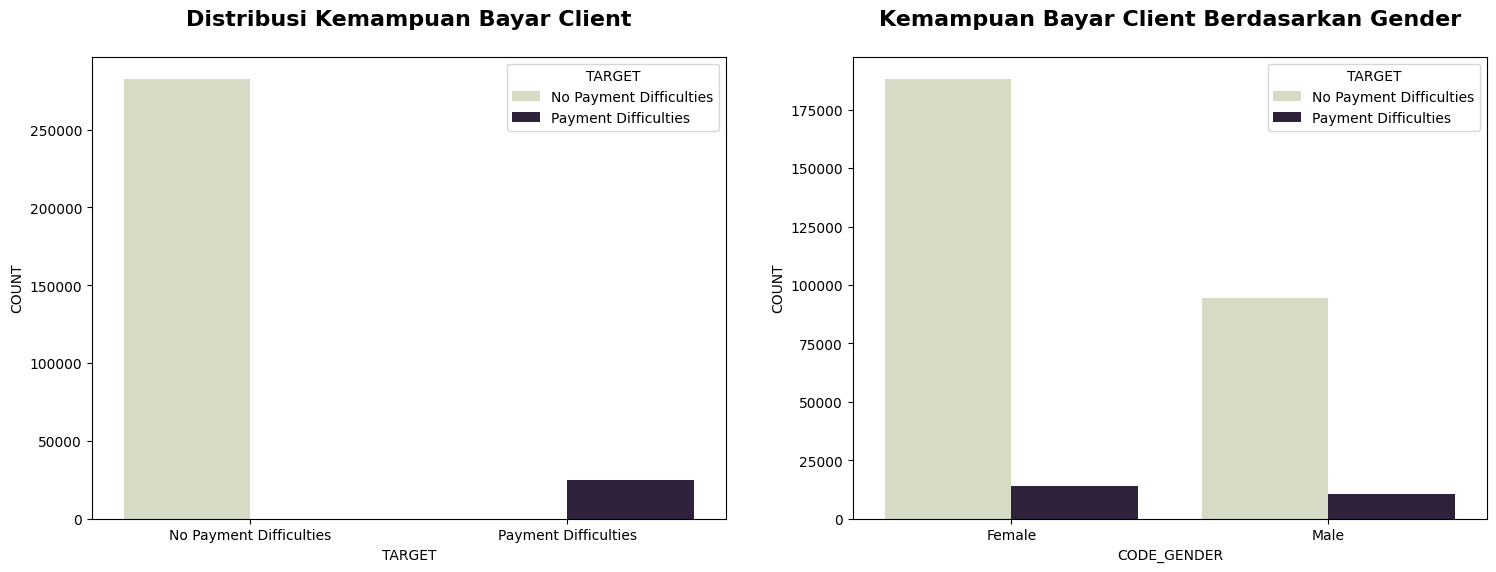

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].set_title('Distribusi Kemampuan Bayar Client\n', fontweight='bold', fontsize=16)
sns.barplot(x='TARGET', y='COUNT', data = target_count, hue = 'TARGET', palette="ch:start=.5,rot=-.75", ax=ax[0])
ax[1].set_title('Kemampuan Bayar Client Berdasarkan Gender\n', fontweight='bold', fontsize=16)
sns.barplot(x='CODE_GENDER', y='COUNT' , data = target_count_by_gender, hue = 'TARGET', palette="ch:start=.5,rot=-.75", ax=ax[1])

Sebagian besar client tidak memiliki kesulitan dalam pembayaran kredit dan jumlah client yang memiliki kemampuan dan kesulitan pembayaran kredit didominasi oleh wanita.

In [136]:
credit_by_contract_income = train_df.groupby(['NAME_INCOME_TYPE','TARGET']).agg(
    COUNT= ('TARGET', 'count'), CREDIT_SUM= ('AMT_CREDIT_x', 'sum')
    ).reset_index().replace(
        [0,1],['No Payment Difficulties','Payment Difficulties']
        )

credit_by_contract_income

,NAME_INCOME_TYPE,TARGET,COUNT,CREDIT_SUM
0,Businessman,No Payment Difficulties,10,1.228500e+07
1,Commercial associate,No Payment Difficulties,66256,4.472157e+10
2,Commercial associate,Payment Difficulties,5360,3.255063e+09
3,Maternity leave,No Payment Difficulties,3,1.890000e+06
4,Maternity leave,Payment Difficulties,2,1.858500e+06
5,Pensioner,No Payment Difficulties,52380,2.837236e+10
6,Pensioner,Payment Difficulties,2982,1.664072e+09
7,State servant,No Payment Difficulties,20454,1.376918e+10
8,State servant,Payment Difficulties,1249,7.679058e+08
9,Student,No Payment Difficulties,18,9.194175e+06


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Businessman'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'Maternity leave'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'State servant'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Unemployed'),
  Text(7, 0, 'Working')])

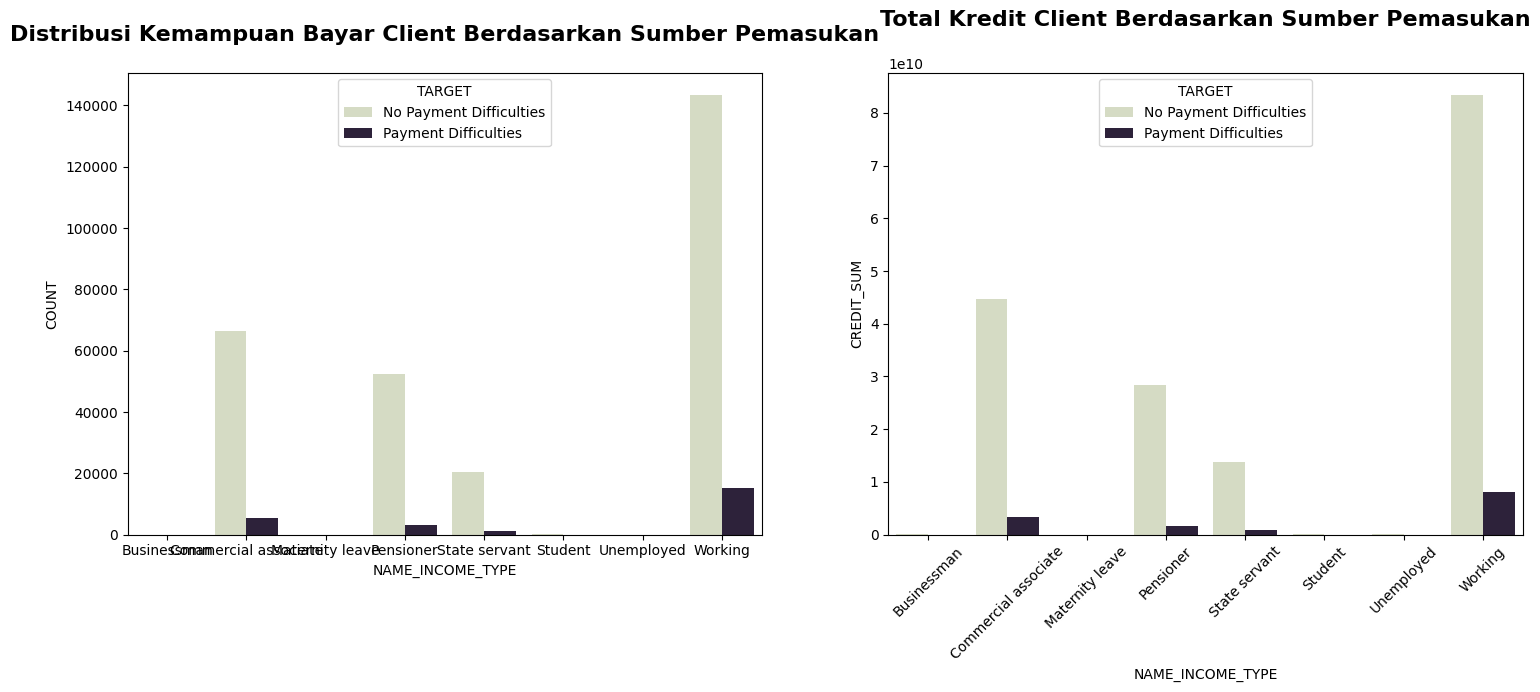

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].set_title('Distribusi Kemampuan Bayar Client Berdasarkan Sumber Pemasukan\n', fontweight='bold', fontsize=16)
sns.barplot(x='NAME_INCOME_TYPE', y='COUNT', data = credit_by_contract_income, hue = 'TARGET', palette="ch:start=.5,rot=-.75", ax=ax[0])
plt.xticks(rotation=45)
ax[1].set_title('Total Kredit Client Berdasarkan Sumber Pemasukan\n', fontweight='bold', fontsize=16)
sns.barplot(x='NAME_INCOME_TYPE', y='CREDIT_SUM', data = credit_by_contract_income, hue = 'TARGET', palette="ch:start=.5,rot=-.75", ax=ax[1])
plt.xticks(rotation=45)

Jumlah peminjam dan total pinjaman kredit terbanyak berasal dari kalangan pekerja dan kalangan commercial associate

# Machine Learning Modelling

## Feature Encoding & Scaling

In [37]:
#Membuat copy dari train_df
train = train_df.copy()
train.drop(['SK_ID_CURR'], inplace=True, axis=1) #Menghapus kolom SK_ID_CURR
object_columns = train.select_dtypes(include='object').columns #Melihat kolom dengan tipe data object
object_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'CREDIT_ACTIVE', 'CREDIT_TYPE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON'],
      dtype='object')

In [38]:
#Membuat feature baru berupa rasio jumlah kredit dengan total pemasukan
train['CREDIT_INCOME_RATIO'] = train['AMT_CREDIT_x'] / train['AMT_INCOME_TOTAL']

#Membuat feature baru berupa total pemasukan per anggota keluarga (termasuk client)
train['INCOME_PER_CAPITA'] = train['AMT_INCOME_TOTAL'] / (train['CNT_CHILDREN'] + 1)

In [39]:
#Mendapatkan kolom object dengan nilai unik < 3 untuk diterapkan Label Encoding
column_to_label = [column for column in object_columns if train[column].nunique() < 3]

#Mendapatkan kolom object dengan nilai unik < 3 untuk diterapkan One-Hot Encoding
column_to_ohe = [column for column in object_columns if column not in column_to_label]

label_encoder = LabelEncoder()

# Label encoding
for column in column_to_label:
    train[column] = label_encoder.fit_transform(train[column])

# Ohe Hot Encoding
train = pd.get_dummies(train, columns=column_to_ohe)

Jumlah kolom train setelah feature encoding:  (307507, 190)


In [40]:
#Mendapatkan kolom numerik dengan nilai maks > 1 untuk diterapkan MinMaxScaler
column_to_scale = [column for column in train if train[column].max() > 1]

scaler = MinMaxScaler()

# Menerapkan Min-Max Scaling pada column_to_scale
train[column_to_scale] = scaler.fit_transform(train[column_to_scale])

In [41]:
train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA
0,1,0,1,0,1,0.0,0.001512,0.090287,0.095729,0.086667,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0.0,0.002089,0.311736,0.138353,0.278889,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,1,0.0,0.000358,0.022472,0.026160,0.033333,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0.0,0.000935,0.066837,0.115053,0.073333,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,0.0,0.000819,0.116854,0.084742,0.126667,...,0,0,0,0,0,0,0,0,1,0


## Setting test_df

In [98]:
#Melihat jumlah duplikasi dataset test_df
test_df.duplicated().sum()

0

In [99]:
#Melihat info deskripsi statistik test_df
test_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,NaN,NaN,NaN,277796.67635,103169.547296,100001.0,188557.75,277549.0,367555.5,456250.0
NAME_CONTRACT_TYPE,48744,2,Cash loans,48305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,48744,2,F,32678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,48744,2,N,32311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,48744,2,Y,33658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
DAYS_FIRST_DRAWING,47580.0,NaN,NaN,NaN,343990.222145,49893.953013,-2920.0,365243.0,365243.0,365243.0,365243.0
DAYS_FIRST_DUE,47580.0,NaN,NaN,NaN,13537.960295,41757.175969,-2891.0,-1332.5,-820.0,-405.0,365243.0
DAYS_LAST_DUE_1ST_VERSION,47580.0,NaN,NaN,NaN,32489.918104,57816.783827,-2796.0,-765.35,-189.1,60389.208333,365243.0
DAYS_LAST_DUE,47580.0,NaN,NaN,NaN,78525.490985,102782.486005,-2850.0,-812.5,-15.0,121523.0,365243.0


Kolom DAYS memiliki nilai yang negatif, sehingga perlu diubah nilainya menjadi positif. Serta terdapat kolom DAYS yang memiliki nilai maksimal yang sangat besar seperti di dataset train_df.

In [100]:
#Mengecek jumlah missing value dari test_df
checksum_isna(test_df)

,Column,Type,Total Null Value,Percentage
0,OWN_CAR_AGE,float64,32312,66.289184
1,EXT_SOURCE_1,float64,20532,42.122107
2,OCCUPATION_TYPE,object,15605,32.014197
3,DAYS_ENDDATE_FACT,float64,10944,22.451994
4,EXT_SOURCE_3,float64,8668,17.782701
...,...,...,...,...
64,REG_REGION_NOT_LIVE_REGION,int64,0,0.000000
65,REG_REGION_NOT_WORK_REGION,int64,0,0.000000
66,LIVE_REGION_NOT_WORK_REGION,int64,0,0.000000
67,NAME_CONTRACT_TYPE,object,0,0.000000


Kolom dataset test_df memiliki missing value terbanyak dari kolom yang sama dengan dataset train_df

In [101]:
#Memilih kolom yang sama dengan train_df
test_df = test_df.drop(test_df.columns[[17,64,65,66,67,68]], axis=1).drop(columns=['OWN_CAR_AGE','EXT_SOURCE_1'],axis=1)

In [102]:
#Melihat info dataset test_df
test_df.info('all')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Data columns (total 61 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT_x                 48744 non-null  float64
 8   AMT_ANNUITY_x                48720 non-null  float64
 9   AMT_GOODS_PRICE_x            48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

In [103]:
#Memberikan nilai absolut untuk kolom 'DAYS...'
days = test_df.iloc[:,[16,17,18,40,41,42,43,50]].abs()
for column in list(days.columns):
  test_df[column] = days[column]

In [104]:
#Mengisi nilai missing value dengan modus untuk kolom bertipe data 'object', sebaliknya dengan nilai nol dan median untuk kolom bertipe data numerik
for column in list(test_df.columns):
  if test_df[column].isnull().sum() > 0:
    if test_df[column].dtypes == 'object':
      test_df[column].fillna(test_df[column].mode()[0], inplace=True)
    elif column.find('AMT') == 0: #Mencari kolom dengan nama depan 'AMT' dan mengembalikan posisi index
      test_df[column].fillna(0, inplace=True) #Mengisi dengan nilai nol
    else:
      test_df[column].fillna(test_df[column].median(), inplace=True)

checksum_isna(test_df)

,Column,Type,Total Null Value,Percentage
0,SK_ID_CURR,int64,0,0.0
1,LIVE_REGION_NOT_WORK_REGION,int64,0,0.0
2,REG_CITY_NOT_WORK_CITY,int64,0,0.0
3,LIVE_CITY_NOT_WORK_CITY,int64,0,0.0
4,ORGANIZATION_TYPE,object,0,0.0
...,...,...,...,...
56,OCCUPATION_TYPE,object,0,0.0
57,CNT_FAM_MEMBERS,float64,0,0.0
58,REGION_RATING_CLIENT,int64,0,0.0
59,REGION_RATING_CLIENT_W_CITY,int64,0,0.0


In [105]:
test_df.DAYS_BIRTH = (test_df.DAYS_BIRTH / 365).astype(int)
test_df.DAYS_BIRTH.sample(5)

15162    42
5052     58
34182    50
23137    60
19263    24
Name: DAYS_BIRTH, dtype: int64

Kini dataset test_df telah bersih dari missing value dan siap untuk diberi label

In [106]:
#Membuat copy dari test_df
test = test_df.copy()
test.drop(['SK_ID_CURR'], inplace=True, axis=1) #Menghapus kolom SK_ID_CURR
object_columns = test.select_dtypes(include='object').columns #Melihat kolom dengan tipe data object
object_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE', 'CREDIT_ACTIVE', 'CREDIT_TYPE',
       'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON'],
      dtype='object')

In [107]:
#Membuat feature baru berupa rasio jumlah kredit dengan total pemasukan
test['CREDIT_INCOME_RATIO'] = test['AMT_CREDIT_x'] / test['AMT_INCOME_TOTAL']

#Membuat feature baru berupa total pemasukan per anggota keluarga (termasuk client)
test['INCOME_PER_CAPITA'] = test['AMT_INCOME_TOTAL'] / (test['CNT_CHILDREN'] + 1)

In [108]:
#Mendapatkan kolom object dengan nilai unik < 3 untuk diterapkan Label Encoding
column_to_label = [column for column in object_columns if test[column].nunique() < 3]

#Mendapatkan kolom object dengan nilai unik < 3 untuk diterapkan One-Hot Encoding
column_to_ohe = [column for column in object_columns if column not in column_to_label]

label_encoder = LabelEncoder()

# Label encoding
for column in column_to_label:
    test[column] = label_encoder.fit_transform(test[column])

# Ohe Hot Encoding
test = pd.get_dummies(test, columns=column_to_ohe)

In [109]:
#Mendapatkan kolom numerik dengan nilai maks > 1 untuk diterapkan MinMaxScaler
column_to_scale = [column for column in test if test[column].max() > 1]

scaler = MinMaxScaler()

# Menerapkan Min-Max Scaling pada column_to_scale
test[column_to_scale] = scaler.fit_transform(test[column_to_scale])

In [110]:
test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,...,NAME_CONTRACT_STATUS_Unused offer,CODE_REJECT_REASON_CLIENT,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCO,CODE_REJECT_REASON_SCOFR,CODE_REJECT_REASON_SYSTEM,CODE_REJECT_REASON_VERIF,CODE_REJECT_REASON_XAP,CODE_REJECT_REASON_XNA
0,0,0,0,1,0.00,0.024654,0.238037,0.113861,0.184049,0.018850,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0.00,0.016440,0.080785,0.096192,0.061350,0.035792,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,0.00,0.040054,0.280965,0.386413,0.265849,0.019101,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0.10,0.065721,0.695297,0.271456,0.695297,0.026392,...,1,1,0,0,0,0,0,0,0,0
4,0,1,1,0,0.05,0.034920,0.263804,0.177582,0.263804,0.010032,...,0,0,0,0,0,0,0,0,1,0


In [111]:
print("Jumlah kolom train setelah feature encoding: ", train.shape)
print("Jumlah kolom test setelah feature encoding: ", test.shape)

Jumlah kolom train setelah feature encoding:  (307507, 190)
Jumlah kolom test setelah feature encoding:  (48744, 184)


Jumlah kolom pada train dan test jauh berbeda, harus disamakan terlebih dahulu dengan dataset test.

In [112]:
#Menyamakan kolom train & test data
labels = train['TARGET']

training, testing = train.align(test, join='inner',axis=1)

training['TARGET'] = labels
print("Train data shape setelah alignment: ", training.shape)
print("Test data shape setelah alignment: ", testing.shape)

Train data shape setelah alignment:  (307507, 185)
Test data shape setelah alignment:  (48744, 184)


## Splitting Data

In [113]:
#Membagi dataset train ke dalam dua dataset X(feature) dan Y(target)
X= training.drop(['TARGET'], axis=1)
print('Baris dan kolom data X:', X.shape)
y= training['TARGET']
print('Baris dan kolom data Y:', y.shape)

#Membagi dataset ke dalam train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 75% training and 25% test
print('Baris dan kolom data X_train:', X_train.shape)
print('Baris dan kolom data X_test:', X_test.shape)
print('Baris dan kolom data y_train:', y_train.shape)
print('Baris dan kolom data y_test:', y_test.shape)

Baris dan kolom data X: (307507, 184)
Baris dan kolom data Y: (307507,)
Baris dan kolom data X_train: (230630, 184)
Baris dan kolom data X_test: (76877, 184)
Baris dan kolom data y_train: (230630,)
Baris dan kolom data y_test: (76877,)


In [114]:
y_train.value_counts()

0    212061
1     18569
Name: TARGET, dtype: int64

Data TARGET mengalami ketidakseimbangan, sehingga diperlukan SMOTE supaya data menjadi lebih seimbang

In [115]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.5)
X_train, y_train = smote.fit_resample(X_train, y_train)
print('SMOTE')
print(pd.Series(y_train).value_counts())

SMOTE
0    212061
1    106030
Name: TARGET, dtype: int64


Data TARGET menjadi lebih berimbang setelah dilakukan SMOTE

## Modelling

## Logistic Regression

In [116]:
#Melatih model dengan Logistic Regression
model_logress = LogisticRegression()
model_logress.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
#Prediksi X_train
y_train_logress = model_logress.predict(X_train)

#Print classification report
print('Classification Reports dari Training Model Logistic Regression:')
print(classification_report(y_train, y_train_logress))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Logistic Regression:\n', confusion_matrix(y_train, y_train_logress))

Classification Reports dari Training Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91    212061
           1       0.93      0.66      0.77    106030

    accuracy                           0.87    318091
   macro avg       0.89      0.82      0.84    318091
weighted avg       0.88      0.87      0.86    318091

Confusion Matrix dari Testing Model Logistic Regression:
 [[206938   5123]
 [ 36553  69477]]


In [118]:
#Prediksi data X_test
y_test_logress = model_logress.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Logistic Regression:')
print(classification_report(y_test, y_test_logress))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Logistic Regression:\n', confusion_matrix(y_test, y_test_logress))

Classification Reports dari Testing Model Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     70621
           1       0.28      0.11      0.16      6256

    accuracy                           0.91     76877
   macro avg       0.60      0.54      0.55     76877
weighted avg       0.87      0.91      0.89     76877

Confusion Matrix dari Testing Model Logistic Regression:
 [[68908  1713]
 [ 5579   677]]


In [119]:
#Tes Akurasi Model
acc_log_train= round(model_logress.score(X_train,y_train)*100, 2)
acc_log_test= round(model_logress.score(X_test,y_test)*100, 2)
print(f"Akurasi Training Logistic Regression: {acc_log_train} %")
print(f"Akurasi Testing Logistic Regression: {acc_log_test} %")

Akurasi Training Logistic Regression: 86.9 %
Akurasi Testing Logistic Regression: 90.51 %


In [120]:
#ROC score
roc_auc_log = round(roc_auc_score(y_test, y_test_logress),3)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.542


##Decision Tree

In [121]:
#Melatih model dengan Decision Tree
decision = DecisionTreeClassifier().fit(X_train, y_train)

In [122]:
#Prediksi data X_train
y_train_decision = decision.predict(X_train)

#Print classification report
print('Classification Reports dari Training Model Decision Tree:')
print(classification_report(y_train, y_train_decision))

#Print confusion matrix
print('Confusion Matrix dari Training Model Decision Tree:\n', confusion_matrix(y_train, y_train_decision))

Classification Reports dari Training Model Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212061
           1       1.00      1.00      1.00    106030

    accuracy                           1.00    318091
   macro avg       1.00      1.00      1.00    318091
weighted avg       1.00      1.00      1.00    318091

Confusion Matrix dari Training Model Decision Tree:
 [[212061      0]
 [     0 106030]]


In [123]:
#Prediksi data X_test
y_test_decision = decision.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Decision Tree:')
print(classification_report(y_test, y_test_decision))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Decision Tree:\n', confusion_matrix(y_test, y_test_decision))

Classification Reports dari Testing Model Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89     70621
           1       0.12      0.22      0.16      6256

    accuracy                           0.81     76877
   macro avg       0.52      0.54      0.53     76877
weighted avg       0.86      0.81      0.83     76877

Confusion Matrix dari Testing Model Decision Tree:
 [[60695  9926]
 [ 4858  1398]]


In [124]:
#Tes Akurasi Model
acc_dec_train= round(decision.score(X_train,y_train)*100, 2)
acc_dec_test= round(decision.score(X_test,y_test)*100, 2)
print(f"Akurasi Training Decision Tree: {acc_dec_train} %")
print(f"Akurasi Testing Decision Tree: {acc_dec_test} %")

Akurasi Training Decision Tree: 100.0 %
Akurasi Testing Decision Tree: 80.77 %


In [125]:
#ROC score
roc_auc_dec = round(roc_auc_score(y_test, y_test_decision), 3)
print('ROC AUC:', roc_auc_dec)

ROC AUC: 0.541


## Random Forest

In [126]:
#Melatih model dengan Random Forest
random_forest = RandomForestClassifier().fit(X_train, y_train)

In [127]:
#Prediksi data X_train
y_train_rf = random_forest.predict(X_train)

#Print classification report
print('Classification Reports dari Training Model Random Forest:')
print(classification_report(y_train, y_train_rf))

#Print confusion matrix
print('Confusion Matrix dari Training Model Random Forest:\n', confusion_matrix(y_train, y_train_rf))

Classification Reports dari Training Model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    212061
           1       1.00      1.00      1.00    106030

    accuracy                           1.00    318091
   macro avg       1.00      1.00      1.00    318091
weighted avg       1.00      1.00      1.00    318091

Confusion Matrix dari Training Model Random Forest:
 [[212061      0]
 [     0 106030]]


In [128]:
#Prediksi data X_test
y_test_rf = random_forest.predict(X_test)

#Print classification report
print('Classification Reports dari Testing Model Random Forest:')
print(classification_report(y_test, y_test_rf))

#Print confusion matrix
print('Confusion Matrix dari Testing Model Random Forest:\n', confusion_matrix(y_test, y_test_rf))

Classification Reports dari Testing Model Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     70621
           1       0.26      0.04      0.07      6256

    accuracy                           0.91     76877
   macro avg       0.59      0.51      0.51     76877
weighted avg       0.87      0.91      0.88     76877

Confusion Matrix dari Testing Model Random Forest:
 [[69922   699]
 [ 6007   249]]


In [129]:
#Tes Akurasi Model
acc_rf_train= round(random_forest.score(X_train,y_train)*100, 2)
acc_rf_test= round(random_forest.score(X_test,y_test)*100, 2)
print(f"Akurasi Training Random Forest: {acc_rf_train} %")
print(f"Akurasi Testing Random Forest: {acc_rf_test} %")

Akurasi Training Random Forest: 100.0 %
Akurasi Testing Random Forest: 91.28 %


In [130]:
#ROC score
roc_auc_rf = round(roc_auc_score(y_test, y_test_rf), 3)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.515


In [133]:
results = pd.DataFrame({
  "Models": ["Logistic Regression", "Decision Tree", "Random Forest"],
  "Training Accuracy Score": [86.90, 100.0, 100.0],
  "Testing Accuracy Score": [90.51, 80.77, 91.28],
  "ROC Score": [0.542, 0.541, 0.515]
  })

results.sort_values(by=['Testing Accuracy Score', 'ROC Score'], ascending=False)

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
2,Random Forest,100.0,91.28,0.515
0,Logistic Regression,86.9,90.51,0.542
1,Decision Tree,100.0,80.77,0.541


Berdasarkan model-model di atas, dapat diketahui bahwa model dengan prediksi terbaik dilakukan dengan menggunakan algoritma Logistic Regression dengan margin akurasi yang lebih kecil.

## Prediksi test_df

In [134]:
#Memprediksi dataset testing dengan menggunakan Logistic Regression
predict = pd.Series(model_logress.predict(testing), name = "TARGET").astype(int)
results = pd.concat([test_df['SK_ID_CURR'], predict],axis = 1)
results.to_csv("submission_predict_application.csv", index = False)
results.head(10)

,SK_ID_CURR,TARGET
0,100001,0
1,100005,1
2,100013,0
3,100028,0
4,100038,0
5,100042,0
6,100057,0
7,100065,0
8,100066,0
9,100067,0
